**Regression : Multiple Linear Regression**

In [40]:
import matplotlib.pyplot as plt #import the required libraries
import numpy as np
import pandas as pd

In [41]:
#define your data
x1 = np.array([5,10,10])
x2 = np.array([2,1,2])
y = np.array([0,-1,1])

In [42]:
#create a data frame with your data points
data= pd.DataFrame({"x1" : x1, "x2" : x2, "y" : y})
data

,x1,x2,y
0,5,2,0
1,10,1,-1
2,10,2,1


In [43]:
x1_mean = round(data["x1"].mean(),2) #perform ordinary least squares regression
x2_mean = round(data["x2"].mean(),2)
y_mean = round(data["y"].mean(),2)

In [44]:
weight1 = np.sum((x1 - x1_mean)* (y - y_mean))/np.sum((x1 - x1_mean)**2) #these are your initial weights to start gradient descent with
weight2 = np.sum((x2 - x2_mean)* (y - y_mean))/np.sum((x2 - x2_mean)**2)
bias = y_mean - (weight1 * x1_mean) - (weight2 * x2_mean)
print(round(weight1,2))
print(round(weight2,2))
print(round(bias,2))

0.0
1.5
-2.5


In [45]:
#define your error/cost function (MSE) and your method to minimize your cost function (gradient descent)
#your multiple linear regression equation is of the form : y_hat = weight1*x1 + weight2*x2 + bias

n = 3

def mean_squared_error(y, y_hat):
    cost = np.sum((y-y_hat)**2) / n
    return cost

def gradient_descent(x1, x2, y):
      
    weight1 = 0
    weight2 = 1.5
    bias = -2.5
    iterations = 10000
    learning_rate = 0.01      
    costs = []
    weights1 = []
    weights2 = []
    previous_cost = None
       
    for i in range(iterations):
          
        y_hat = (weight1 * x1) + (weight2 * x2) + bias
          
        current_cost = mean_squared_error(y, y_hat)
        if current_cost <= 1e-4:
          break
        previous_cost = current_cost
  
        costs.append(current_cost)
        weights1.append(weight1)
        weights2.append(weight2)
          
        weight1_pderivative = -(2/n) * sum(x1 * (y-y_hat))
        weight2_pderivative = -(2/n) * sum(x2 * (y-y_hat))
        bias_derivative = -(2/n) * sum(y-y_hat)
          
        weight1 = weight1 - (learning_rate * weight1_pderivative)
        weight2 = weight2 - (learning_rate * weight2_pderivative)
        bias = bias - (learning_rate * bias_derivative)
                  
        print(f"Iteration {i+1}: Cost {current_cost}, Weight1 {weight1}, Weight2 {weight2}, Bias {bias}")
    return weight1, weight2, bias

In [46]:
estimated_weight1, estimated_weight2, estimated_bias = gradient_descent(data["x1"], data["x2"], data["y"])
print(f"Estimated Weight1: {estimated_weight1}\nEstimated Weight2: {estimated_weight2}\nEstimated Bias: {estimated_bias}") #print your final estimated weights and bias

Streaming output truncated to the last 5000 lines.
Iteration 4833: Cost 0.0036170656259477767, Weight1 0.175401842265719, Weight2 1.8702890168940487, Bias -4.571131993274139
Iteration 4834: Cost 0.0036144689694014437, Weight1 0.17541067324108395, Weight2 1.870335584385352, Bias -4.571285961016078
Iteration 4835: Cost 0.003611874176969772, Weight1 0.1754195010460438, Weight2 1.8703821351584777, Bias -4.571439873482116
Iteration 4836: Cost 0.00360928124731459, Weight1 0.17542832568173666, Weight2 1.8704286692194279, Bias -4.571593730692097
Iteration 4837: Cost 0.0036066901790986587, Weight1 0.17543714714930045, Weight2 1.8704751865742024, Bias -4.571747532665859
Iteration 4838: Cost 0.0036041009709855618, Weight1 0.17544596544987232, Weight2 1.8705216872287989, Bias -4.5719012794232325
Iteration 4839: Cost 0.003601513621640042, Weight1 0.17545478058458958, Weight2 1.8705681711892128, Bias -4.57205497098404
Iteration 4840: Cost 0.0035989281297277194, Weight1 0.1754635925545885, Weight2 1.

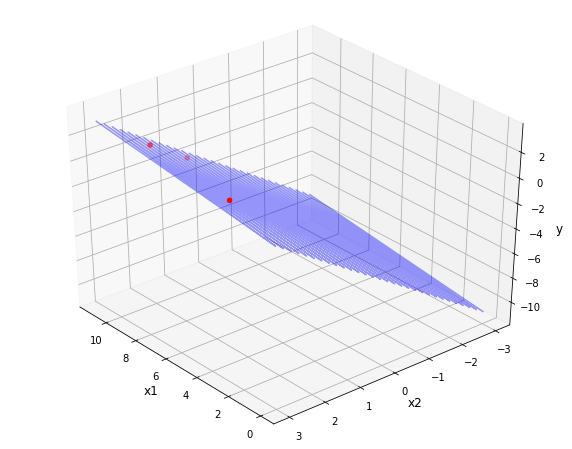

In [47]:
#visualize your plot
x = data[['x1', 'x2']].values.reshape(-1,2)  
y = data['y']
X = x[:, 0]  
Y = x[:, 1]  
Z = y

x_pred = np.linspace(0, 11, 30)   
y_pred = np.linspace(-3, 3, 30)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)  
#model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T  

predicted = estimated_weight1*xx_pred.flatten() + estimated_weight2*yy_pred.flatten() + estimated_bias  

fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(X, Y, Z, c='r') 
ax.plot(xx_pred.flatten(), yy_pred.flatten(), predicted, alpha =0.4, color = 'blue') 
ax.set_xlabel('x1', fontsize=12)  
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('y', fontsize=12)

ax.view_init(elev=35, azim=140) 


In [48]:
from sklearn.linear_model import LinearRegression  
regr = LinearRegression()  #perform linear regression using the in built libraries in python
x_sum = np.array(data[["x1", "x2"]]).reshape(3,2)
y_lr = np.array(data["y"]).reshape(3,1)
regr.fit(x_sum, y_lr)
print(regr.coef_)
print(regr.intercept_)

[[0.2 2. ]]
[-5.]


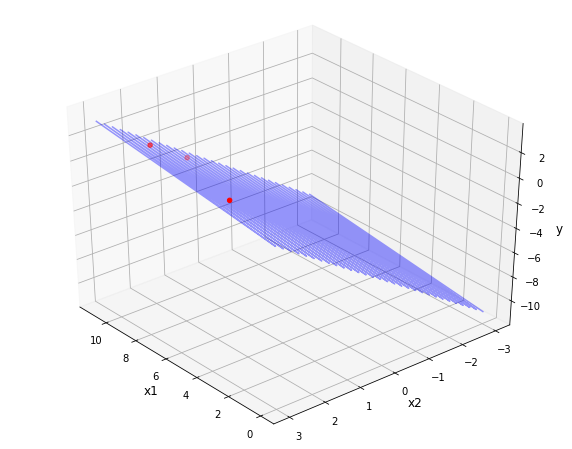

In [49]:
#visualize your plot
x = data[['x1', 'x2']].values.reshape(-1,2)  
y = data['y']
X = x[:, 0]  
Y = x[:, 1]  
Z = y

x_pred = np.linspace(0, 11, 30)   
y_pred = np.linspace(-3, 3, 30)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)  
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T  

model = regr.fit(x,y) 
predicted = model.predict(model_viz)  

fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(X, Y, Z, c='r') 
ax.plot(xx_pred.flatten(), yy_pred.flatten(), predicted, alpha =0.4, color = 'blue') 
ax.set_xlabel('x1', fontsize=12)  
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('y', fontsize=12)

ax.view_init(elev=35, azim=140) 

*   The Multiple Linear Regression by **mathematics** : y_hat = 0.196 * x1 + 1.978 * x2 - 4.928
*   The Multiple Linear Regression by **Libraries** : y_hat = 0.2 * x1 + 2 *x2 - 5

In [50]:
x1 = np.array([4,7,8])
x2 = np.array([1,2,1])
data= pd.DataFrame({"x1" : x1, "x2" : x2})
data

,x1,x2
0,4,1
1,7,2
2,8,1


In [51]:
y1 = round(0.196*4 + 1.978*1 - 4.928, 2)
y2 = round(0.196*7 + 1.978*2 - 4.928, 2)
y3 = round(0.196*8 + 1.978*1 - 4.928, 2)
print(y1, y2, y3)

-2.17 0.4 -1.38
